In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the data
Dec_eda = pd.read_csv('C:\\maha\\508\\Dec_EDA.csv') 

In [9]:
Dec_eda.head(5)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_TIME_BLK,...,CARRIER_NAME,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND
0,8,7,WN,N8651A,15016,STL,SAN,0.0,1100-1159,1300-1359,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
1,8,7,WN,N939WN,15016,STL,SAT,0.0,1200-1259,1400-1459,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
2,8,7,WN,N7741C,15016,STL,SAT,0.0,2100-2159,0001-0559,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
3,8,7,WN,N550WN,15016,STL,SEA,0.0,0900-0959,1200-1259,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
4,8,7,WN,N8319F,15016,STL,SFO,1.0,1800-1859,2000-2059,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84


In [13]:
Dec_eda.shape

(558026, 32)

In [15]:
Dec_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558026 entries, 0 to 558025
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DAY_OF_MONTH         558026 non-null  int64  
 1   DAY_OF_WEEK          558026 non-null  int64  
 2   OP_UNIQUE_CARRIER    558026 non-null  object 
 3   TAIL_NUM             558026 non-null  object 
 4   ORIGIN_AIRPORT_ID    558026 non-null  int64  
 5   ORIGIN               558026 non-null  object 
 6   DEST                 558026 non-null  object 
 7   DEP_DEL15            558026 non-null  float64
 8   DEP_TIME_BLK         558026 non-null  object 
 9   ARR_TIME_BLK         558026 non-null  object 
 10  CANCELLED            558026 non-null  float64
 11  CRS_ELAPSED_TIME     558026 non-null  float64
 12  DISTANCE             558026 non-null  float64
 13  DISTANCE_GROUP       558026 non-null  int64  
 14  CARRIER_DELAY        114633 non-null  float64
 15  WEATHER_DELAY    

In [17]:
Dec_eda.nunique()

DAY_OF_MONTH             31
DAY_OF_WEEK               7
OP_UNIQUE_CARRIER        17
TAIL_NUM               5471
ORIGIN_AIRPORT_ID        96
ORIGIN                   96
DEST                    341
DEP_DEL15                 2
DEP_TIME_BLK             19
ARR_TIME_BLK             19
CANCELLED                 1
CRS_ELAPSED_TIME        458
DISTANCE               1444
DISTANCE_GROUP           11
CARRIER_DELAY           804
WEATHER_DELAY           410
NAS_DELAY               418
SECURITY_DELAY           83
LATE_AIRCRAFT_DELAY     560
MANUFACTURE_YEAR         32
NUMBER_OF_SEATS          77
AIRLINE_ID               17
CARRIER_NAME             17
PILOTS_COPILOTS          17
PASSENGER_HANDLING       14
PASS_GEN_SVC_ADMIN       17
MAINTENANCE              17
PRCP                    145
SNOW                     51
SNWD                     20
TMAX                     77
AWND                    100
dtype: int64

In [10]:
Dec_eda.isna().sum()

DAY_OF_MONTH                0
DAY_OF_WEEK                 0
OP_UNIQUE_CARRIER           0
TAIL_NUM                    0
ORIGIN_AIRPORT_ID           0
ORIGIN                      0
DEST                        0
DEP_DEL15                   0
DEP_TIME_BLK                0
ARR_TIME_BLK                0
CANCELLED                   0
CRS_ELAPSED_TIME            0
DISTANCE                    0
DISTANCE_GROUP              0
CARRIER_DELAY          443393
WEATHER_DELAY          443393
NAS_DELAY              443393
SECURITY_DELAY         443393
LATE_AIRCRAFT_DELAY    443393
MANUFACTURE_YEAR        15206
NUMBER_OF_SEATS         15206
AIRLINE_ID                  0
CARRIER_NAME                0
PILOTS_COPILOTS             0
PASSENGER_HANDLING          0
PASS_GEN_SVC_ADMIN          0
MAINTENANCE                 0
PRCP                        0
SNOW                        0
SNWD                        0
TMAX                        0
AWND                        0
dtype: int64

In [19]:
Dec_eda.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,DEP_DEL15,CANCELLED,CRS_ELAPSED_TIME,DISTANCE,DISTANCE_GROUP,CARRIER_DELAY,WEATHER_DELAY,...,AIRLINE_ID,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND
count,558026.000000,558026.000000,558026.000000,558026.000000,558026.0,558026.000000,558026.000000,558026.000000,114633.000000,114633.000000,...,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000,558026.000000
mean,15.830902,3.938745,12666.002996,0.208399,0.0,148.552937,843.568687,3.844704,20.693221,2.556376,...,19954.738880,6132.518447,7380.776432,9991.061352,3576.673642,0.116641,0.048059,0.121935,56.160668,8.137934
std,8.957760,2.085336,1514.187330,0.406164,0.0,74.475448,604.827406,2.372199,64.299138,28.262854,...,368.971181,3163.783165,5905.764240,6417.203879,3092.215270,0.352309,0.347030,0.806783,14.612596,4.014022
min,1.000000,1.000000,10140.000000,0.000000,0.0,34.000000,66.000000,1.000000,0.000000,0.000000,...,19393.000000,586.000000,0.000000,154.000000,34.000000,0.000000,0.000000,0.000000,8.000000,0.000000
25%,8.000000,2.000000,11292.000000,0.000000,0.0,94.000000,400.000000,2.000000,0.000000,0.000000,...,19790.000000,2444.000000,1407.000000,3592.000000,898.000000,0.000000,0.000000,0.000000,45.000000,4.920000
50%,16.000000,4.000000,12889.000000,0.000000,0.0,130.000000,680.000000,3.000000,2.000000,0.000000,...,19930.000000,7637.000000,8586.000000,15237.000000,2482.000000,0.000000,0.000000,0.000000,56.000000,7.610000
75%,23.000000,6.000000,13931.000000,0.000000,0.0,179.000000,1075.000000,5.000000,19.000000,0.000000,...,20314.000000,8989.000000,9668.000000,15502.000000,6122.000000,0.040000,0.000000,0.000000,67.000000,10.510000
max,31.000000,7.000000,15919.000000,1.000000,0.0,705.000000,5095.000000,11.000000,2695.000000,1438.000000,...,20436.000000,9293.000000,16888.000000,15809.000000,9677.000000,7.130000,13.300000,18.100000,87.000000,25.720000


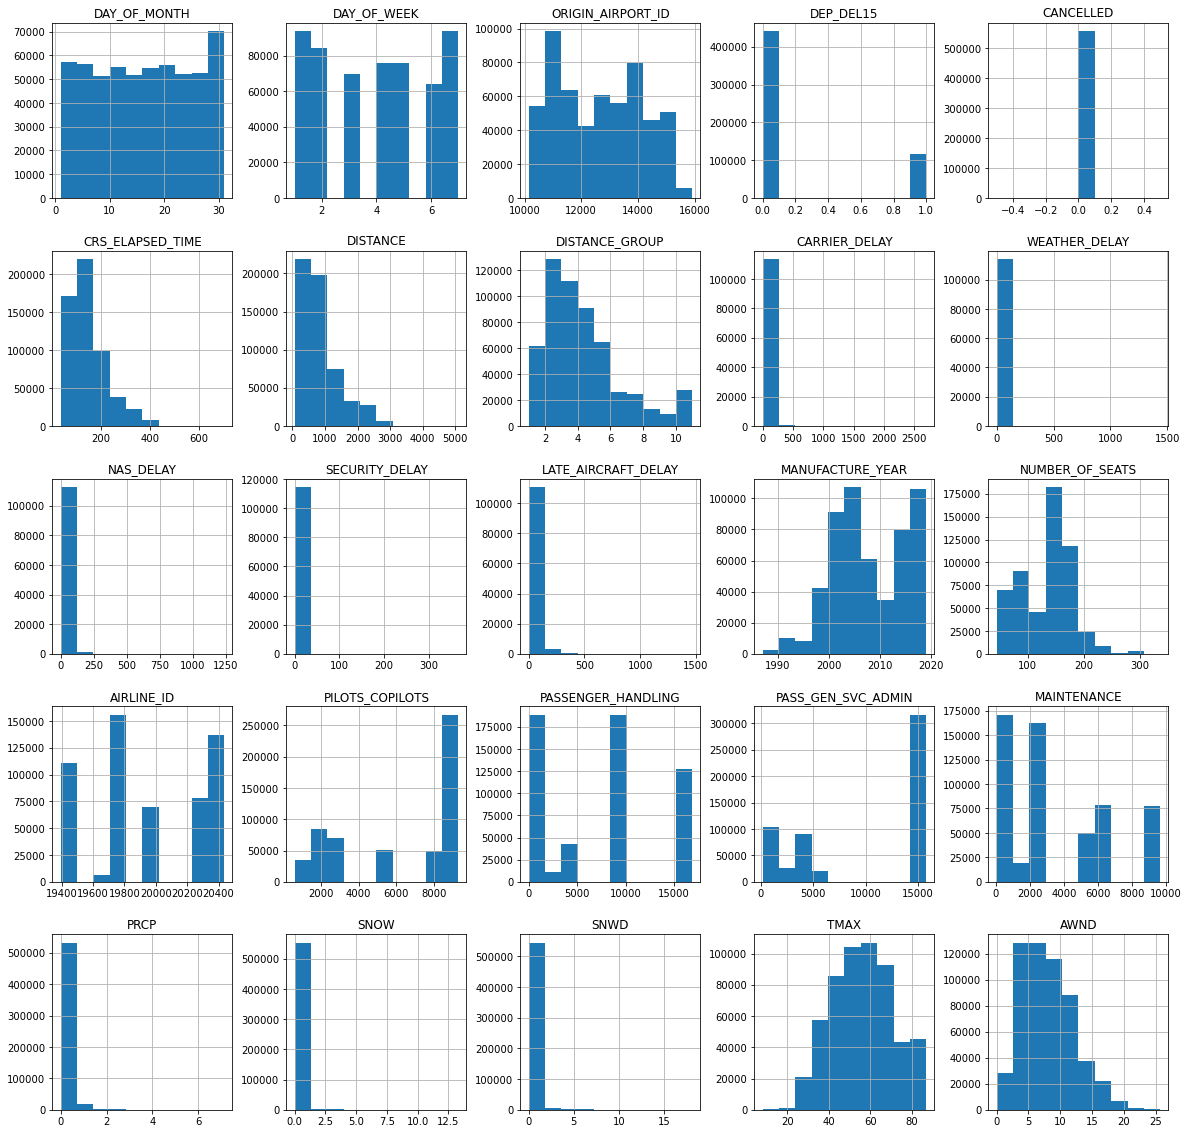

In [12]:
# Graph Distributions of numerical features
histlist = Dec_eda.hist(figsize = (20, 20))

<AxesSubplot:xlabel='DEP_DEL15'>

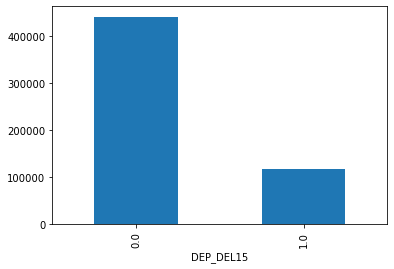

In [34]:
# Departure delay of 15 mins Block distribution 
Dec_eda.groupby('DEP_DEL15').size().plot.bar()

### Block distribution shows the imbalance in the data

<AxesSubplot:xlabel='DEP_TIME_BLK'>

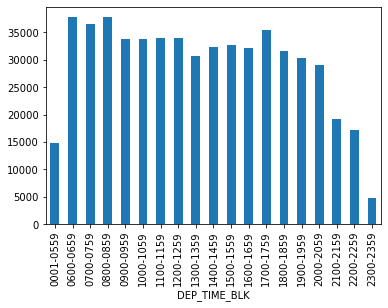

In [20]:
# Departure Time Block distribution
Dec_eda.groupby('DEP_TIME_BLK').size().plot.bar()

<AxesSubplot:xlabel='DAY_OF_WEEK'>

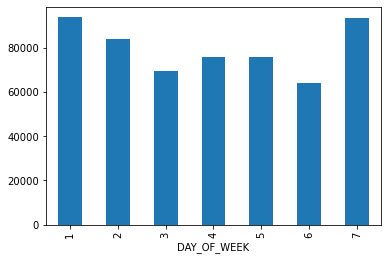

In [21]:
# Day of the week Block distribution
Dec_eda.groupby('DAY_OF_WEEK').size().plot.bar()

<AxesSubplot:xlabel='DISTANCE_GROUP'>

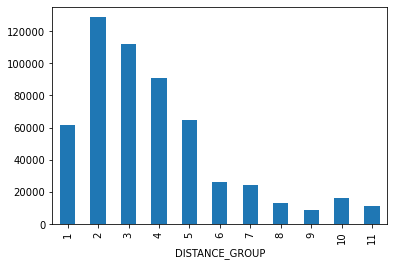

In [28]:
# Departure Time Block distribution
Dec_eda.groupby('DISTANCE_GROUP').size().plot.bar()

In [22]:
# Explore DEPT_TIME_BULK with DEP_DEL15
time_block = pd.crosstab(Dec_eda['DEP_TIME_BLK'], Dec_eda['DEP_DEL15'])
time_block['Total'] = time_block.sum(axis=1)
time_block.loc['Total'] = time_block.sum()
time_block['Percent_Delayed'] = ((time_block.iloc[:,1])/((time_block.iloc[:,0])+(time_block.iloc[:,1])))
time_block = time_block.sort_values('Percent_Delayed')
time_block

DEP_DEL15,0.0,1.0,Total,Percent_Delayed
DEP_TIME_BLK,,,,
0600-0659,34674,3076,37750,0.081483
0001-0559,13563,1340,14903,0.089915
0700-0759,32682,3897,36579,0.106537
0800-0859,32816,4955,37771,0.131185
0900-0959,28526,5323,33849,0.157257
1000-1059,27611,6225,33836,0.183976
1100-1159,27413,6594,34007,0.193901
Total,441734,116292,558026,0.208399
1200-1259,26896,7144,34040,0.209871


In [27]:
# Explore DISTANCE_GROUP with DEP_DEL15
Dist = pd.crosstab(Dec_eda['DISTANCE_GROUP'], Dec_eda['DEP_DEL15'])
Dist['Total'] = Dist.sum(axis=1)
Dist.loc['Total'] = Dist.sum()
Dist['Percent_Delayed'] = ((Dist.iloc[:,1])/((Dist.iloc[:,0])+(Dist.iloc[:,1])))
Dist = Dist.sort_values('Percent_Delayed')
Dist

DEP_DEL15,0.0,1.0,Total,Percent_Delayed
DISTANCE_GROUP,,,,
1,49865,11485,61350,0.187205
3,89178,22676,111854,0.202729
4,72034,18665,90699,0.205791
Total,441734,116292,558026,0.208399
6,20674,5449,26123,0.208590
2,101587,27096,128683,0.210564
5,50593,14149,64742,0.218544
10,12593,3550,16143,0.219910
7,19167,5412,24579,0.220188


In [60]:
# Explore DAY OF THE WEEK with DEP_DEL15
Day = pd.crosstab(Dec_eda['DAY_OF_WEEK'], Dec_eda['DEP_DEL15'])
Day['Total'] = Day.sum(axis=1)
Day.loc['Total'] = Day.sum()
Day['Percent_Delayed'] = ((Day.iloc[:,1])/((Day.iloc[:,0])+(Day.iloc[:,1])))
Day = Day.sort_values('Percent_Delayed')
Day

DEP_DEL15,0.0,1.0,Total,Percent_Delayed
DAY_OF_WEEK,,,,
4,62341,13741,76082,0.180608
5,61721,14436,76157,0.189556
3,55918,13770,69688,0.197595
2,67384,16756,84140,0.199144
6,51445,12815,64260,0.199424
Total,441734,116292,558026,0.208399
7,72592,21109,93701,0.225280
1,70333,23665,93998,0.251761


### Comparing the departure delays with the distance groups

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

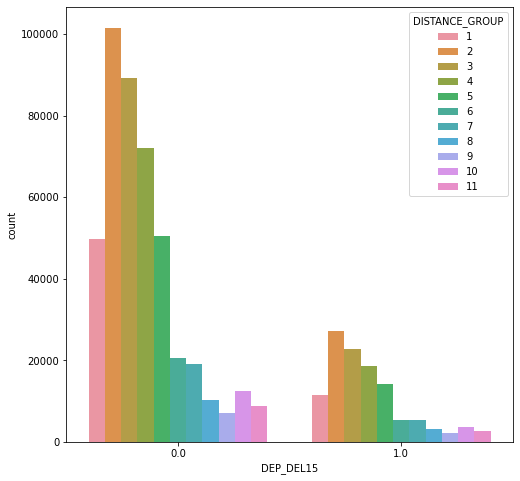

In [30]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DISTANCE_GROUP',data=Dec_eda)

### Comparing departure delays with the days of the week

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

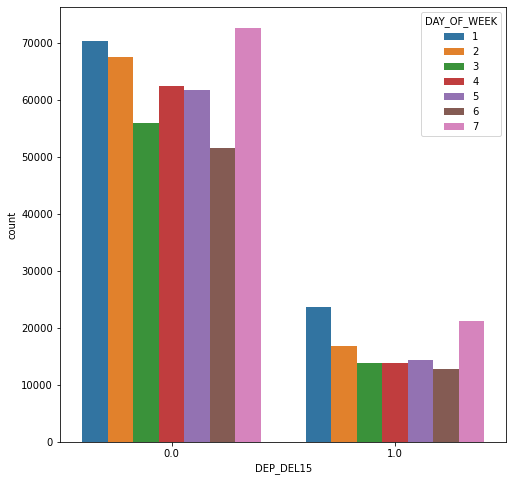

In [31]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DAY_OF_WEEK',data=Dec_eda)

### Comparing departure delays with the departure time blocks

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

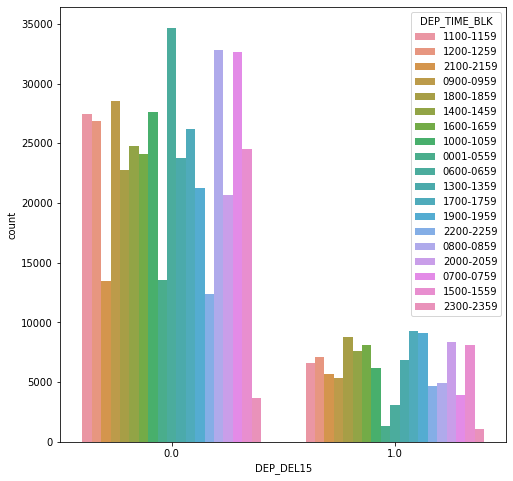

In [32]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DEP_TIME_BLK',data=Dec_eda)

### Making a table with just the delayed data to explore more

In [40]:
Dec_delayed = Dec_eda.loc[Dec_eda['DEP_DEL15'] == 1]
Dec_delayed

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_TIME_BLK,...,CARRIER_NAME,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND
4,8,7,WN,N8319F,15016,STL,SFO,1.0,1800-1859,2000-2059,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
15,8,7,WN,N484WN,15304,TPA,ATL,1.0,1300-1359,1400-1459,...,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,80.0,5.37
22,8,7,WN,N224WN,15304,TPA,BHM,1.0,1200-1259,1200-1259,...,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,80.0,5.37
24,8,7,WN,N284WN,15304,TPA,BNA,1.0,1300-1359,1400-1459,...,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,80.0,5.37
34,8,7,WN,N213WN,15304,TPA,BWI,1.0,2100-2159,2300-2359,...,Southwest Airlines Co.,8989,9668,15475,2482,0.00,0.0,0.0,80.0,5.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
557996,31,2,B6,N198JB,10721,BOS,RDU,1.0,1500-1559,1700-1759,...,JetBlue Airways,2840,4905,3888,726,0.27,0.0,0.0,44.0,13.42
558001,31,2,B6,N603JB,14869,SLC,MCO,1.0,2200-2259,0001-0559,...,JetBlue Airways,2840,4905,3888,726,0.00,0.0,0.0,33.0,4.03
558003,31,2,B6,N768JB,11618,EWR,FLL,1.0,1300-1359,1700-1759,...,JetBlue Airways,2840,4905,3888,726,0.00,0.0,0.0,46.0,10.51
558004,31,2,B6,N768JB,11697,FLL,EWR,1.0,1000-1059,1300-1359,...,JetBlue Airways,2840,4905,3888,726,0.00,0.0,0.0,80.0,5.59


### Conforming the table only has delayed data

In [42]:
Dec_delayed.nunique()

DAY_OF_MONTH             31
DAY_OF_WEEK               7
OP_UNIQUE_CARRIER        17
TAIL_NUM               5379
ORIGIN_AIRPORT_ID        96
ORIGIN                   96
DEST                    338
DEP_DEL15                 1
DEP_TIME_BLK             19
ARR_TIME_BLK             19
CANCELLED                 1
CRS_ELAPSED_TIME        443
DISTANCE               1423
DISTANCE_GROUP           11
CARRIER_DELAY           804
WEATHER_DELAY           410
NAS_DELAY               418
SECURITY_DELAY           83
LATE_AIRCRAFT_DELAY     560
MANUFACTURE_YEAR         32
NUMBER_OF_SEATS          77
AIRLINE_ID               17
CARRIER_NAME             17
PILOTS_COPILOTS          17
PASSENGER_HANDLING       14
PASS_GEN_SVC_ADMIN       17
MAINTENANCE              17
PRCP                    145
SNOW                     51
SNWD                     20
TMAX                     77
AWND                    100
dtype: int64

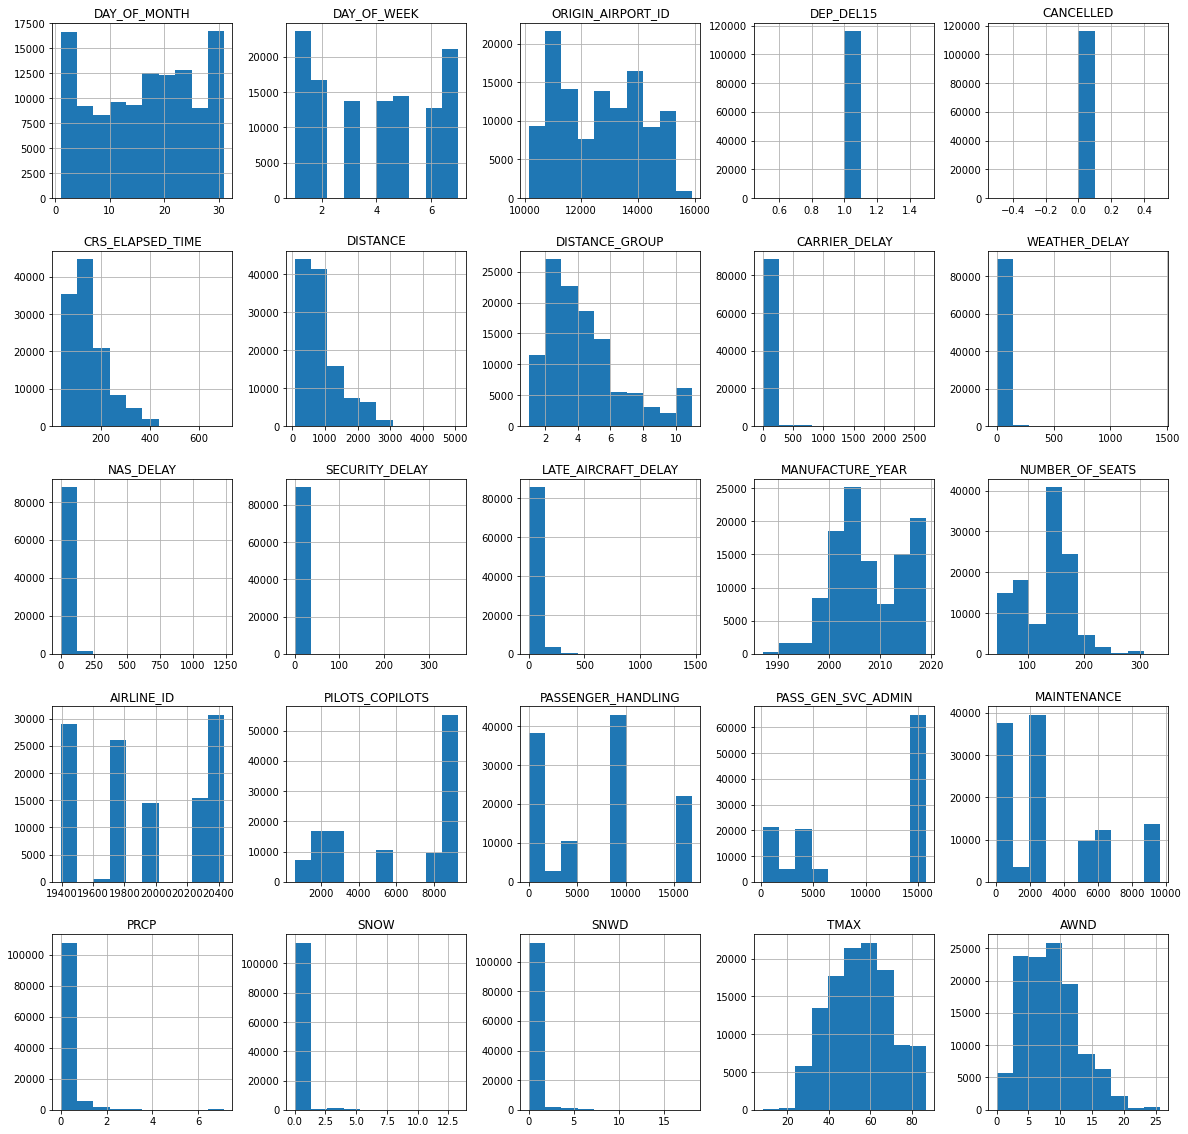

In [41]:
# Graph Distributions of numerical features
histlist = Dec_delayed.hist(figsize = (20, 20))

### Delayed flights distribution based on the departure time block

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

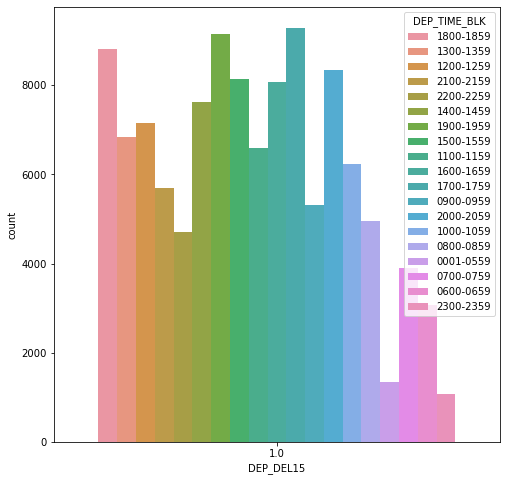

In [43]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DEP_TIME_BLK',data=Dec_delayed)

### Delayed flights distribution based on the days of the week

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

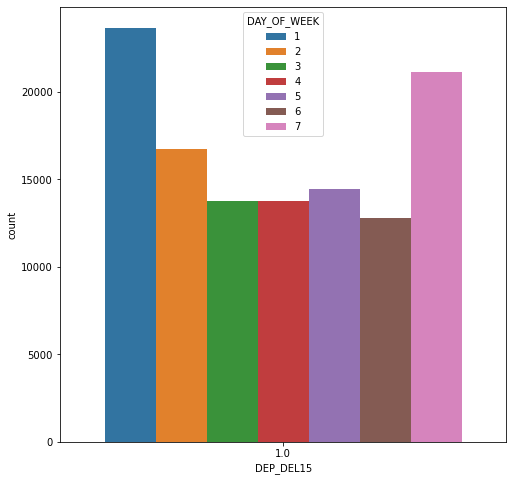

In [45]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DAY_OF_WEEK',data=Dec_delayed)

### Delayed flights distribution based on the distance groups

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

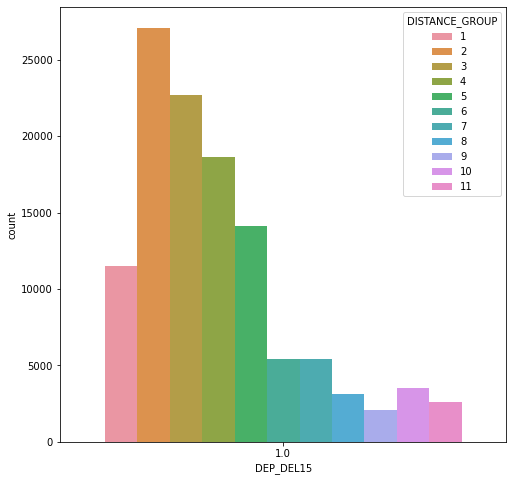

In [47]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DISTANCE_GROUP',data=Dec_delayed)

### Delays based on airlines

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

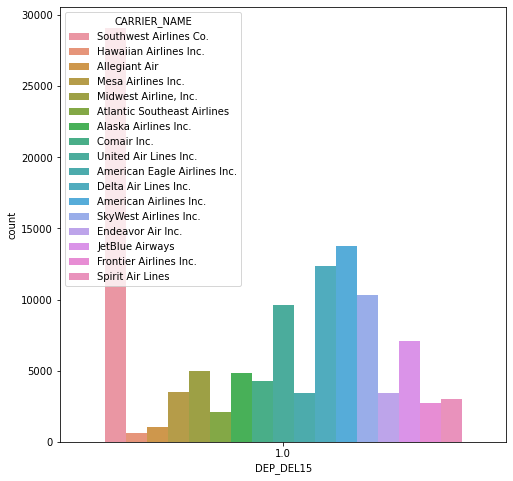

In [48]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='CARRIER_NAME',data=Dec_delayed)

In [51]:
Dec_ontime = Dec_eda.loc[Dec_eda['DEP_DEL15'] == 0]
Dec_ontime

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,DEST,DEP_DEL15,DEP_TIME_BLK,ARR_TIME_BLK,...,CARRIER_NAME,PILOTS_COPILOTS,PASSENGER_HANDLING,PASS_GEN_SVC_ADMIN,MAINTENANCE,PRCP,SNOW,SNWD,TMAX,AWND
0,8,7,WN,N8651A,15016,STL,SAN,0.0,1100-1159,1300-1359,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
1,8,7,WN,N939WN,15016,STL,SAT,0.0,1200-1259,1400-1459,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
2,8,7,WN,N7741C,15016,STL,SAT,0.0,2100-2159,0001-0559,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
3,8,7,WN,N550WN,15016,STL,SEA,0.0,0900-0959,1200-1259,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
5,8,7,WN,N726SW,15016,STL,SJC,0.0,1100-1159,1300-1359,...,Southwest Airlines Co.,8989,9668,15475,2482,0.02,0.0,0.0,58.0,9.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558020,31,2,B6,N633JB,14685,SAV,JFK,0.0,1000-1059,1200-1259,...,JetBlue Airways,2840,4905,3888,726,0.00,0.0,0.0,64.0,10.07
558021,31,2,B6,N348JB,10721,BOS,SYR,0.0,2200-2259,0001-0559,...,JetBlue Airways,2840,4905,3888,726,0.27,0.0,0.0,44.0,13.42
558023,31,2,B6,N304JB,11278,DCA,BOS,0.0,1400-1459,1500-1559,...,JetBlue Airways,2840,4905,3888,726,0.00,0.0,0.0,53.0,7.61
558024,31,2,B6,N193JB,14100,PHL,BOS,0.0,0700-0759,0800-0859,...,JetBlue Airways,2840,4905,3888,726,0.00,0.0,0.0,47.0,9.17


In [52]:
Dec_delayed.nunique()

DAY_OF_MONTH             31
DAY_OF_WEEK               7
OP_UNIQUE_CARRIER        17
TAIL_NUM               5379
ORIGIN_AIRPORT_ID        96
ORIGIN                   96
DEST                    338
DEP_DEL15                 1
DEP_TIME_BLK             19
ARR_TIME_BLK             19
CANCELLED                 1
CRS_ELAPSED_TIME        443
DISTANCE               1423
DISTANCE_GROUP           11
CARRIER_DELAY           804
WEATHER_DELAY           410
NAS_DELAY               418
SECURITY_DELAY           83
LATE_AIRCRAFT_DELAY     560
MANUFACTURE_YEAR         32
NUMBER_OF_SEATS          77
AIRLINE_ID               17
CARRIER_NAME             17
PILOTS_COPILOTS          17
PASSENGER_HANDLING       14
PASS_GEN_SVC_ADMIN       17
MAINTENANCE              17
PRCP                    145
SNOW                     51
SNWD                     20
TMAX                     77
AWND                    100
dtype: int64

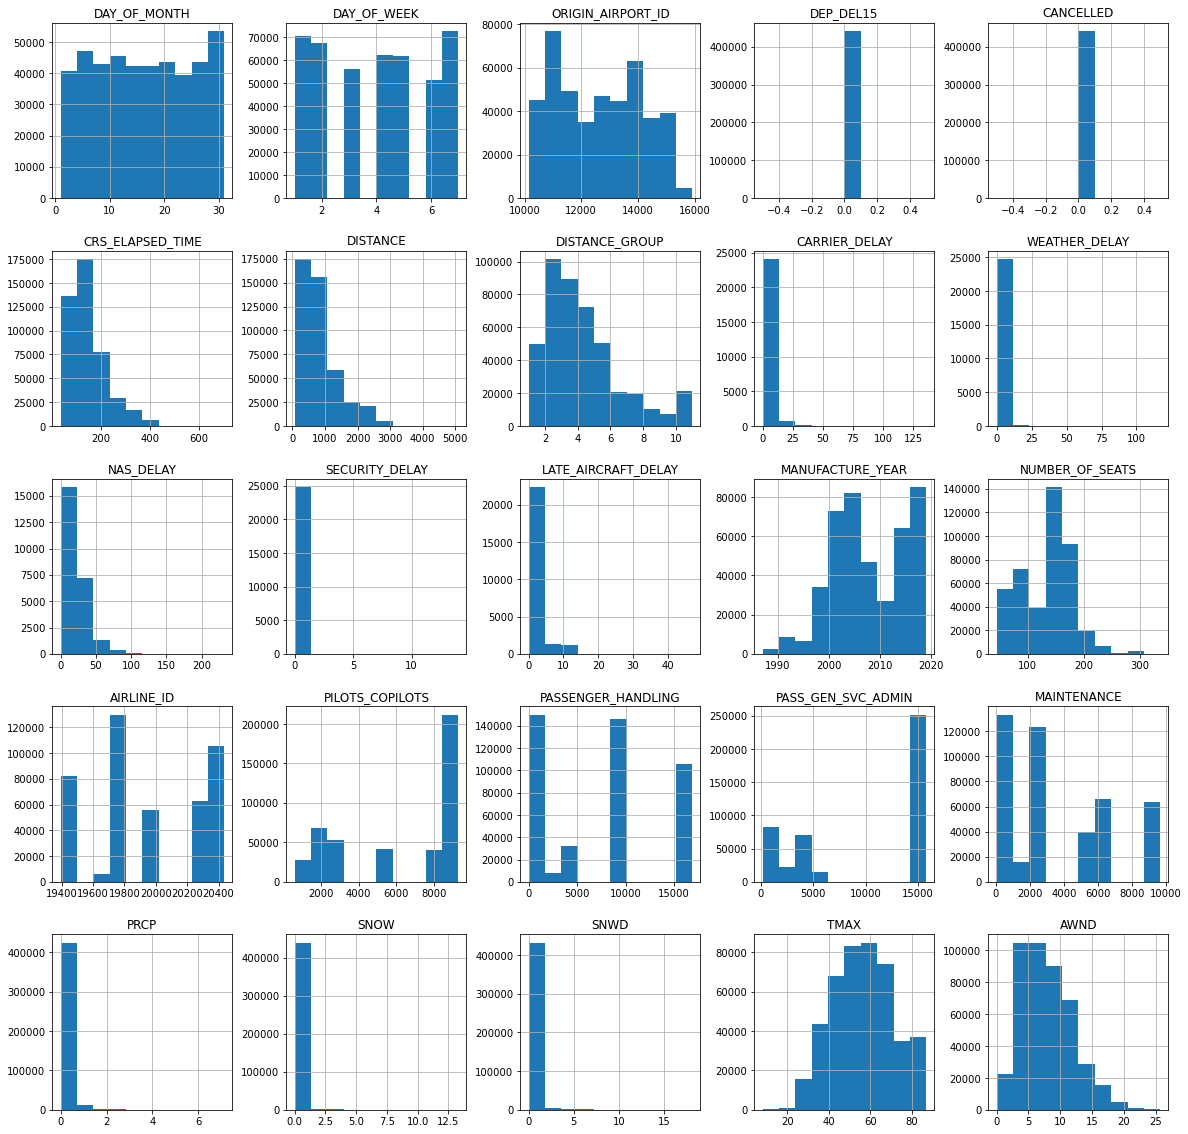

In [53]:
# Graph Distributions of numerical features
histlist = Dec_ontime.hist(figsize = (20, 20))

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

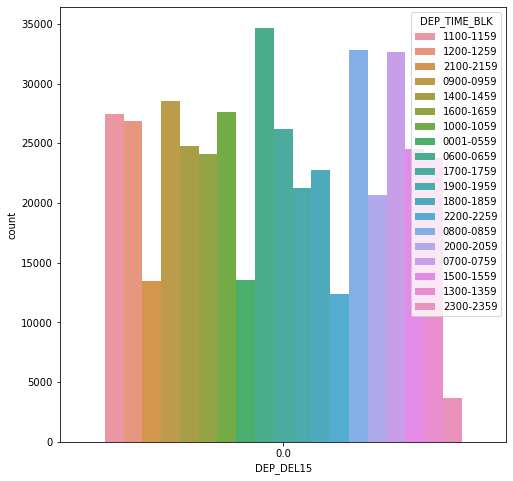

In [54]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DEP_TIME_BLK',data=Dec_ontime)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

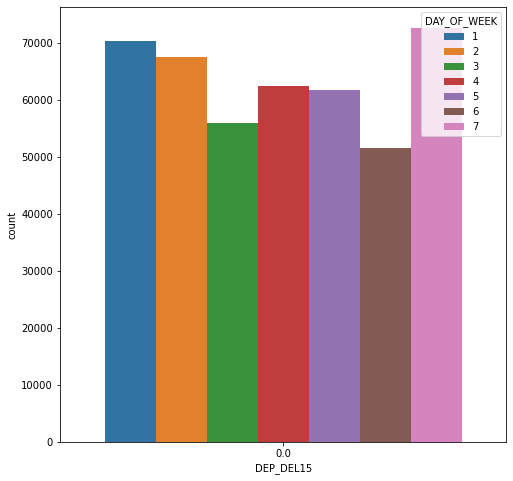

In [55]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DAY_OF_WEEK',data=Dec_ontime)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

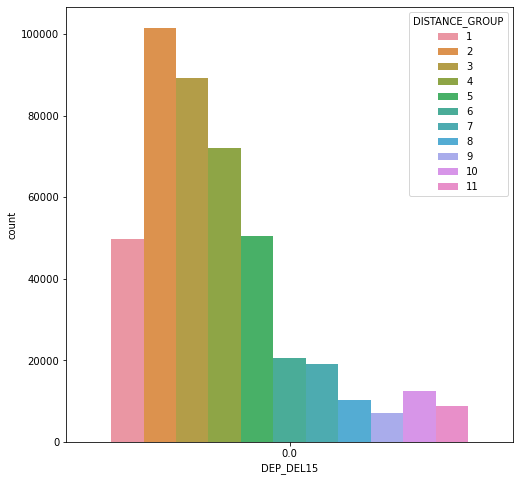

In [56]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='DISTANCE_GROUP',data=Dec_ontime)

<AxesSubplot:xlabel='DEP_DEL15', ylabel='count'>

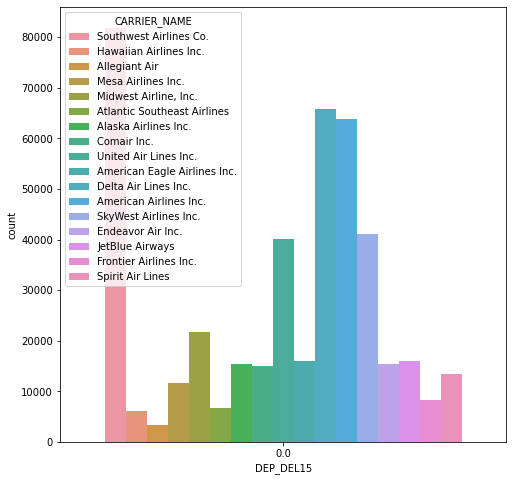

In [57]:
plt.figure(figsize=(8,8))
sns.countplot(x='DEP_DEL15',hue='CARRIER_NAME',data=Dec_ontime)

In [58]:
Dec_ontime['CARRIER_NAME'].value_counts()

Southwest Airlines Co.          81892
Delta Air Lines Inc.            65757
American Airlines Inc.          63842
SkyWest Airlines Inc.           41116
United Air Lines Inc.           40100
Midwest Airline, Inc.           21739
JetBlue Airways                 16004
American Eagle Airlines Inc.    15925
Endeavor Air Inc.               15418
Alaska Airlines Inc.            15380
Comair Inc.                     14932
Spirit Air Lines                13377
Mesa Airlines Inc.              11562
Frontier Airlines Inc.           8339
Atlantic Southeast Airlines      6776
Hawaiian Airlines Inc.           6149
Allegiant Air                    3426
Name: CARRIER_NAME, dtype: int64

In [59]:
Dec_delayed['CARRIER_NAME'].value_counts()

Southwest Airlines Co.          29112
American Airlines Inc.          13740
Delta Air Lines Inc.            12336
SkyWest Airlines Inc.           10360
United Air Lines Inc.            9640
JetBlue Airways                  7099
Midwest Airline, Inc.            4968
Alaska Airlines Inc.             4811
Comair Inc.                      4284
Mesa Airlines Inc.               3524
American Eagle Airlines Inc.     3452
Endeavor Air Inc.                3435
Spirit Air Lines                 2980
Frontier Airlines Inc.           2741
Atlantic Southeast Airlines      2134
Allegiant Air                    1064
Hawaiian Airlines Inc.            612
Name: CARRIER_NAME, dtype: int64